In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format


In [2]:
install = pd.read_csv('Datos\installs.csv.gzip',compression='gzip',engine='python')
install.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3412 entries, 0 to 3411
Data columns (total 18 columns):
created               3412 non-null object
application_id        3412 non-null int64
ref_type              3412 non-null int64
ref_hash              3412 non-null int64
click_hash            0 non-null float64
attributed            3412 non-null bool
implicit              3412 non-null bool
device_countrycode    3412 non-null int64
device_brand          1047 non-null float64
device_model          3411 non-null float64
session_user_agent    3364 non-null object
user_agent            1729 non-null object
event_uuid            865 non-null object
kind                  865 non-null object
wifi                  1729 non-null object
trans_id              6 non-null object
ip_address            3412 non-null int64
device_language       3378 non-null float64
dtypes: bool(2), float64(4), int64(5), object(7)
memory usage: 433.2+ KB


#  1. Analisis por Apps

## 1.1 Implicit Install

In [3]:
tabla1 = install[install['implicit'] == True]
aplicacion_T=tabla1['application_id'].value_counts()
tabla2 = install[install['implicit'] == False]
aplicacion_F=tabla2['application_id'].value_counts()

In [4]:
impTrue=pd.concat([aplicacion_T],axis=1)
impTrue.columns = ['aplicacion_id']

Text(0,0.5,'Cantidad')

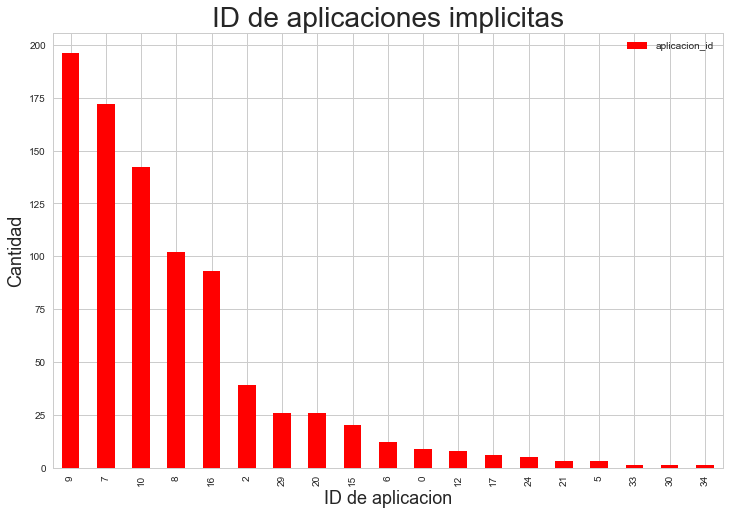

In [5]:
#Grafico de las aplicaciones con implicit = True

g = impTrue.plot.bar(color=["Red"],figsize=(12,8))
g.set_title("ID de aplicaciones implicitas", fontsize=28)
g.set_xlabel("ID de aplicacion",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)


In [6]:
impFalse=pd.concat([aplicacion_F],axis=1)
impFalse.columns = ['aplicacion_id']


Text(0,0.5,'Cantidad')

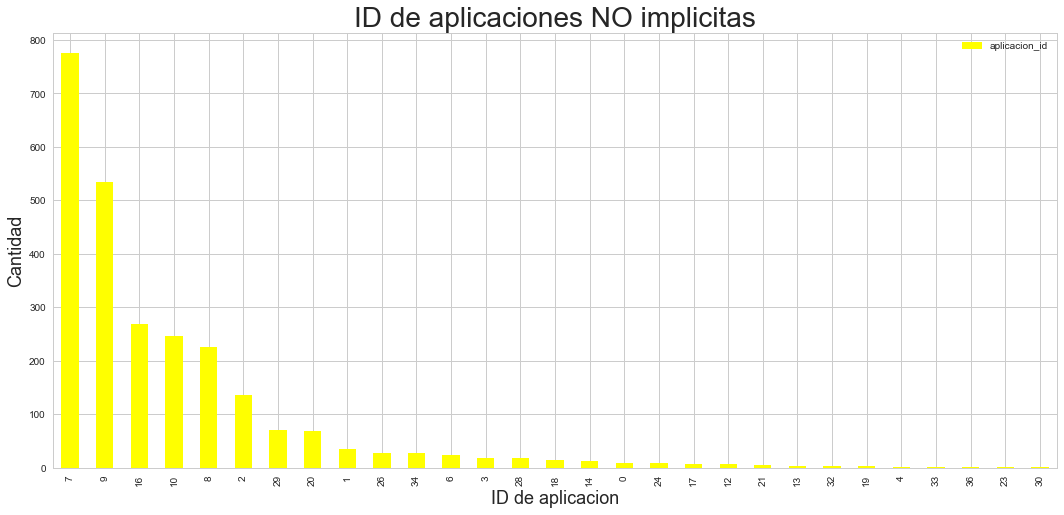

In [8]:
#Grafico de las aplicaciones con implicit = False

g = impFalse.plot.bar(color=["Yellow"],figsize=(18,8))
g.set_title("ID de aplicaciones NO implicitas", fontsize=28)
g.set_xlabel("ID de aplicacion",fontsize=18)
g.set_ylabel("Cantidad",fontsize=18)


In [9]:
impTrue['AppID_True'] = np.log(impTrue['aplicacion_id']+1)
impFalse['AppID_False'] = np.log(impFalse['aplicacion_id']+1)

impTotal = pd.concat([impFalse['AppID_False'],impTrue['AppID_True']],axis=1)
impTotal

,AppID_False,AppID_True
0,2.30,2.30
1,3.56,nan
2,4.91,3.69
3,2.89,nan
4,0.69,nan
5,nan,1.39
6,3.18,2.56
7,6.65,5.15
8,5.42,4.63
9,6.28,5.28


Text(0.5,0,'App ID')

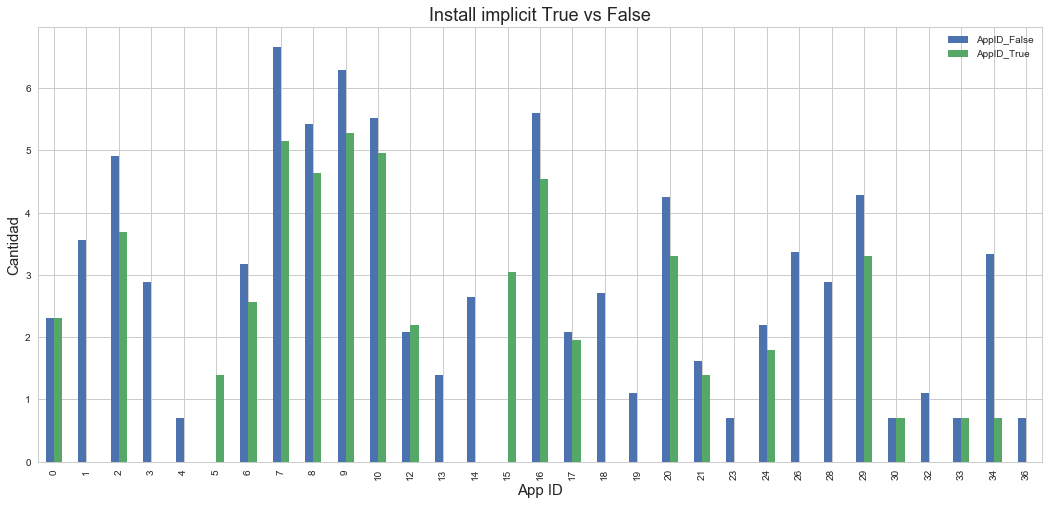

In [10]:
# Grafico de barras de installs por ID de Apps segun implicit

g = impTotal.plot.bar(figsize = (18,8))
g.set_title("Install implicit True vs False",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [11]:
# Atributed es cuando la instalación se le atribuye a Jampp
tablaAtributed2 = install[install['attributed'] == False]
attributed_F=tablaAtributed2['application_id'].value_counts()
attFalse=pd.concat([attributed_F],axis=1)
attFalse.columns = ['aplicacion_id']
attFalse['Att_False'] = np.log(attFalse['aplicacion_id']+1)

Text(0.5,0,'App ID')

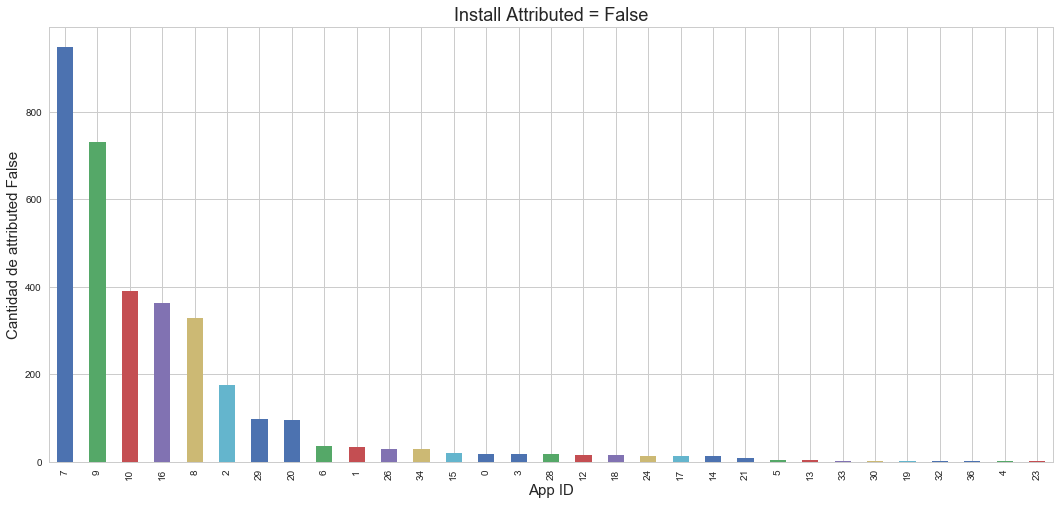

In [12]:
# TODOS los attributed son FALSE
# Grafico de barras de attributed por ID de Apps


g = attFalse['aplicacion_id'].plot.bar(figsize = (18,8))
g.set_title("Install Attributed = False",fontsize=18)
g.set_ylabel("Cantidad de attributed False",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [13]:
tablaWiFi_T = install[install['wifi'] == True]
wifi_T=tablaWiFi_T['application_id'].value_counts()
tablaWiFi_F = install[install['wifi'] == False]
wifi_F=tablaWiFi_F['application_id'].value_counts()


In [14]:
wifiTrue=pd.concat([wifi_T],axis=1)
wifiTrue.columns = ['Cant True']
wifiFalse=pd.concat([wifi_F],axis=1)
wifiFalse.columns = ['Cant False']
wifiTotal = pd.concat([wifiFalse['Cant False'],wifiTrue['Cant True']],axis=1)

Text(0.5,0,'App ID')

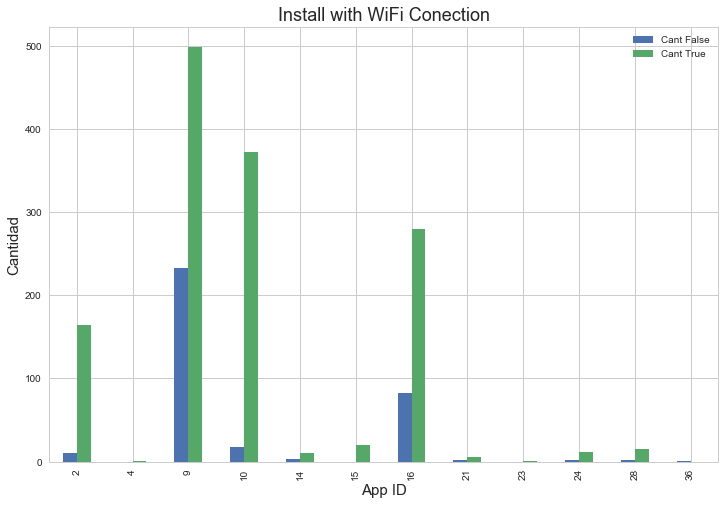

In [15]:

g = wifiTotal.plot.bar(figsize = (12,8))
g.set_title("Install with WiFi Conection",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [16]:
install['año'],install['mes'],install['dia']= install['created'].str.split(' ').str[0].str.split('-').str


In [17]:
install['compra'] = install['implicit']==True
for_heatmap = install.pivot_table(index='dia', columns='application_id', values='compra', aggfunc='sum')

Text(34,0.5,'Dias')

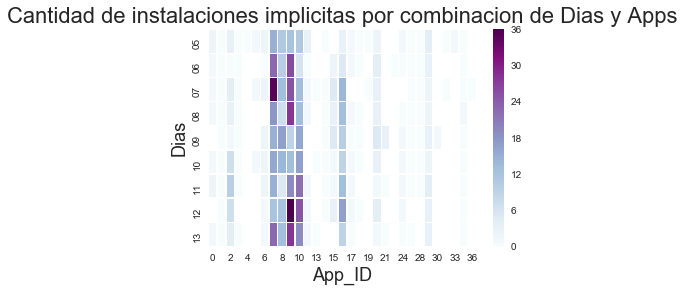

In [18]:
g = sns.heatmap(for_heatmap, linewidths=.5, cmap="BuPu") # annot=True
g.set_title("Cantidad de instalaciones implicitas por combinacion de Dias y Apps", fontsize=22)
g.set_xlabel("App_ID",fontsize=18)
g.set_ylabel("Dias", fontsize=18)

In [33]:
'''Solo hay dos marcas, se supone que la de mayor numero es equivalente a Android pues hay mas dispositivos disponibles
    con ese Sistema Operativo
'''
install['ref_type'].value_counts()

1891515180541284343    2080
1494519392962156891    1332
Name: ref_type, dtype: int64

In [40]:
installSO = install
installSO['SO'] = installSO['ref_type'].apply(lambda marca: 'Apple' if (marca == 1494519392962156891) else 'Android')
installSO['SO'].value_counts()

Android    2080
Apple      1332
Name: SO, dtype: int64

In [73]:
androidInstall = installSO[installSO['SO'] == 'Android']
androidInstall = pd.concat([androidInstall['application_id']],axis=1)
androidInstall = androidInstall['application_id'].value_counts()
androidInstall

7     947
10    389
16    362
2     174
29     97
34     28
0      18
3      17
28     17
18     14
14     13
32      2
36      1
4       1
Name: application_id, dtype: int64

Text(0,0.5,'App_ID')

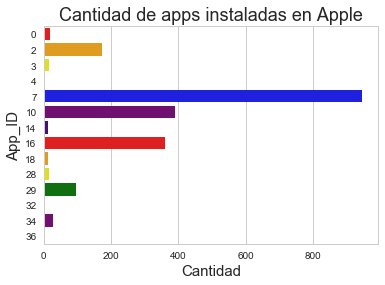

In [74]:
g = sns.barplot(x=androidInstall.values, y=androidInstall.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de apps instaladas en Android", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("App_ID", fontsize=15)

In [66]:
appleInstall = installSO[installSO['SO'] == 'Apple']
appleInstall = pd.concat([androidInstall['application_id']],axis=1)
appleInstall = appleInstall['application_id'].value_counts()
appleInstall

9     731
8     328
20     95
6      35
1      34
26     28
15     20
12     15
17     13
24     13
21      7
13      3
5       3
30      2
19      2
33      2
23      1
Name: application_id, dtype: int64

Text(0,0.5,'App_ID')

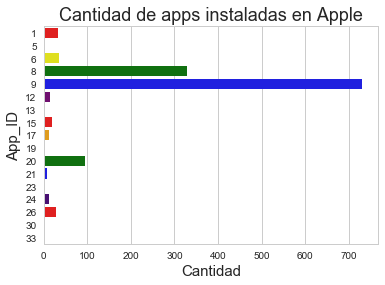

In [71]:
g = sns.barplot(x=appleInstall.values, y=appleInstall.index, orient='h',palette=['red','orange','yellow','green','blue','purple','indigo'])
g.set_title("Cantidad de apps instaladas en Apple", fontsize=18)
g.set_xlabel("Cantidad", fontsize=15)
g.set_ylabel("App_ID", fontsize=15)


Las dos apps mas instaladas son la 7 y la 9 cada una instalada en distintos Sistemas Operativos

In [75]:
install['dia'].value_counts()

12    472
13    423
07    393
11    377
09    368
08    366
10    351
05    337
06    325
Name: dia, dtype: int64

In [94]:
#junto los días que tienen mas de dos fechas
lunes = install[install['dia'].astype('str')== '11']

martes = install[install['dia'].astype('str')== '05']
martes2= install[install['dia'].astype('str') == '12']

miercoles = install[install['dia'].astype('str') == '06']
miercoles2 = install[install['dia'].astype('str') == '13']
miercoles.append(miercoles2)

jueves = install[install['dia'].astype('str')== '07']

viernes= install[install['dia'].astype('str')== '08']

sabado = install[install['dia'].astype('str')== '09']

domingo = install[install['dia'].astype('str')== '10']



In [113]:
cuentaLunes = lunes['application_id'].value_counts()
lun = pd.concat([cuentaLunes],axis=1)
lun.columns = ['CANT']

Text(0.5,0,'App ID')

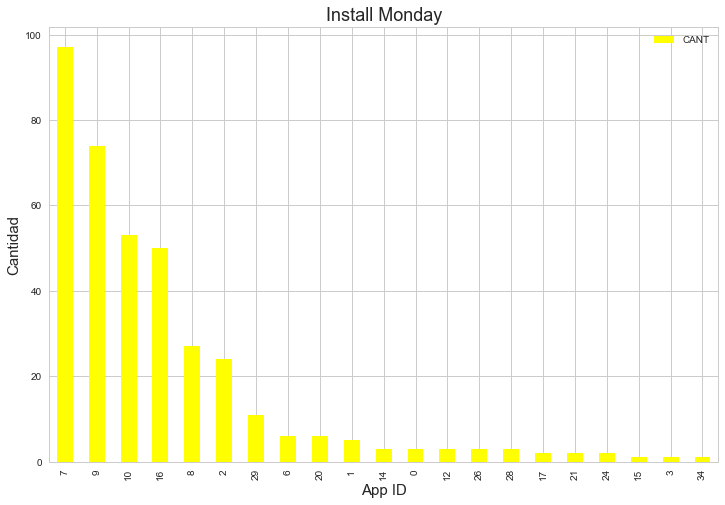

In [119]:
g = lun.plot.bar(figsize = (12,8),color=['yellow'])
g.set_title("Install Monday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [107]:
martes.append(martes2)
cuentaMartes = martes['application_id'].value_counts()
mar = pd.concat([cuentaMartes],axis=1)
mar.columns = ['CANT']

Text(0.5,0,'App ID')

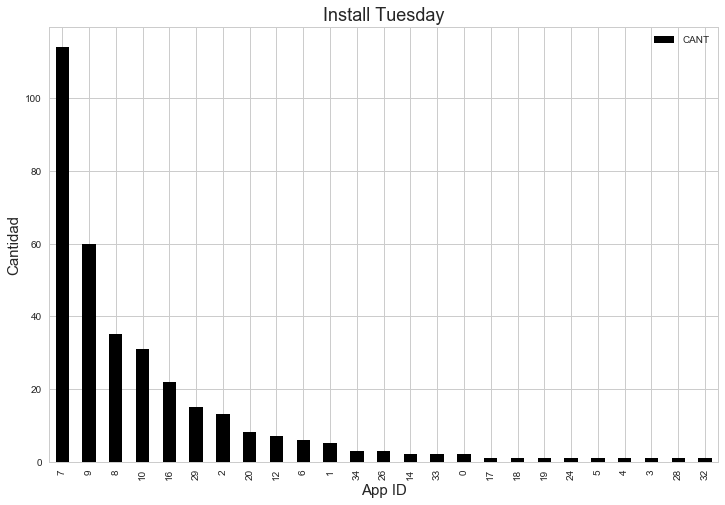

In [114]:
g = mar.plot.bar(figsize = (12,8),color=['black'])
g.set_title("Install Tuesday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [109]:
miercoles.append(miercoles2)
cuentaMiercoles = miercoles['application_id'].value_counts()
mie = pd.concat([cuentaMiercoles],axis=1)
mie.columns = ['CANT']

Text(0.5,0,'App ID')

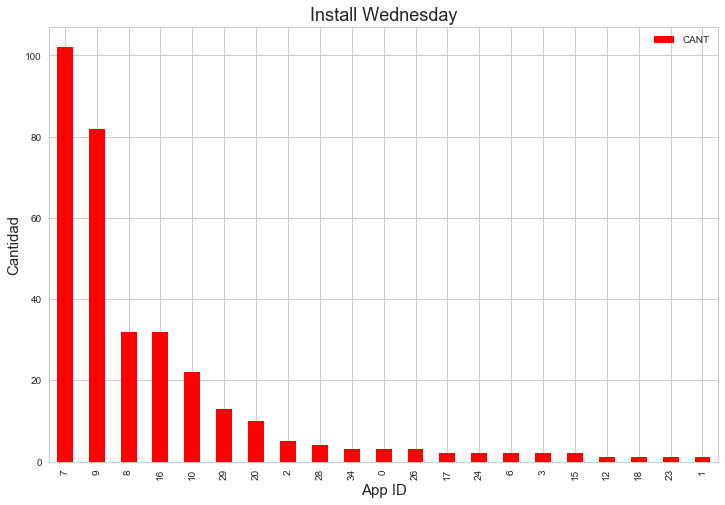

In [110]:
g = mie.plot.bar(figsize = (12,8),color=['red'])
g.set_title("Install Wednesday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [115]:
cuentaJueves = jueves['application_id'].value_counts()
jue = pd.concat([cuentaJueves],axis=1)
jue.columns = ['CANT']

Text(0.5,0,'App ID')

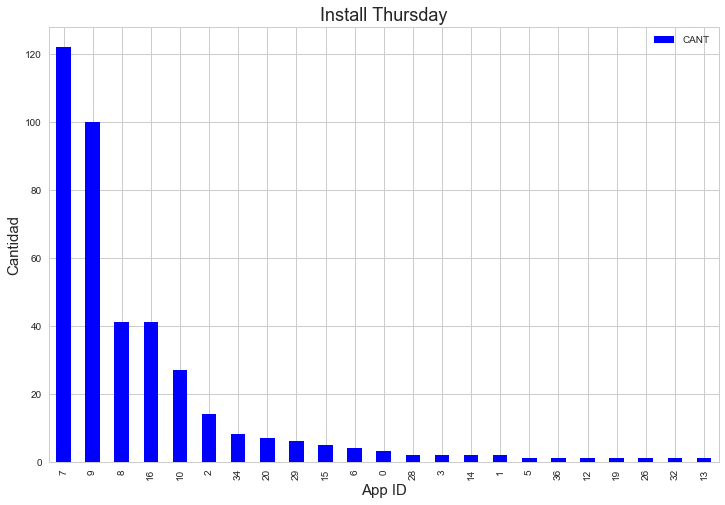

In [120]:
g = jue.plot.bar(figsize = (12,8),color=['blue'])
g.set_title("Install Thursday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [118]:
cuentaViernes = viernes['application_id'].value_counts()
vie = pd.concat([cuentaViernes],axis=1)
vie.columns = ['CANT']

Text(0.5,0,'App ID')

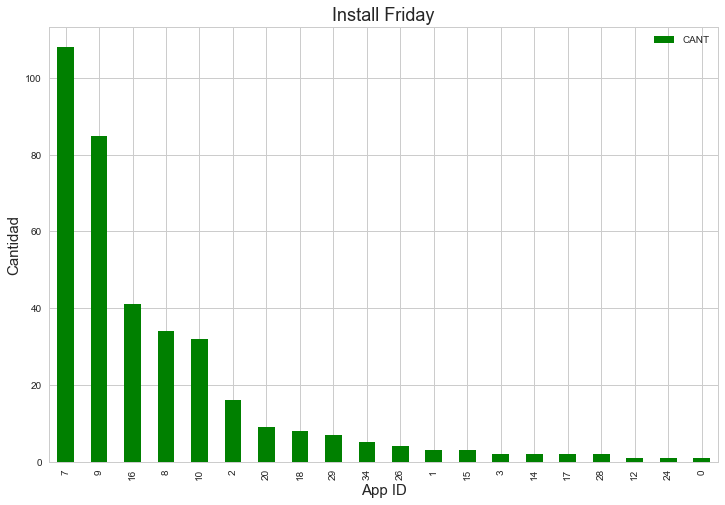

In [121]:
g = vie.plot.bar(figsize = (12,8),color=['green'])
g.set_title("Install Friday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [117]:
cuentaSabado = sabado['application_id'].value_counts()
sab = pd.concat([cuentaSabado],axis=1)
sab.columns = ['CANT']

Text(0.5,0,'App ID')

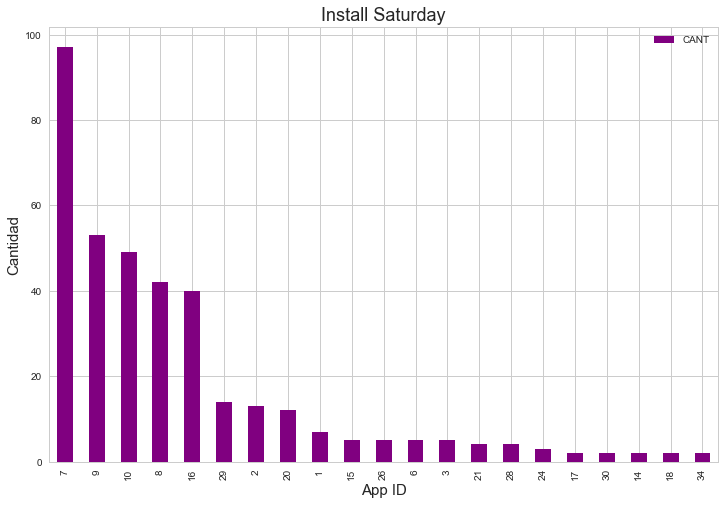

In [122]:
g = sab.plot.bar(figsize = (12,8),color=['purple'])
g.set_title("Install Saturday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)

In [111]:
cuentaDomingo = domingo['application_id'].value_counts()
dom = pd.concat([cuentaDomingo],axis=1)
dom.columns = ['CANT']

Text(0.5,0,'App ID')

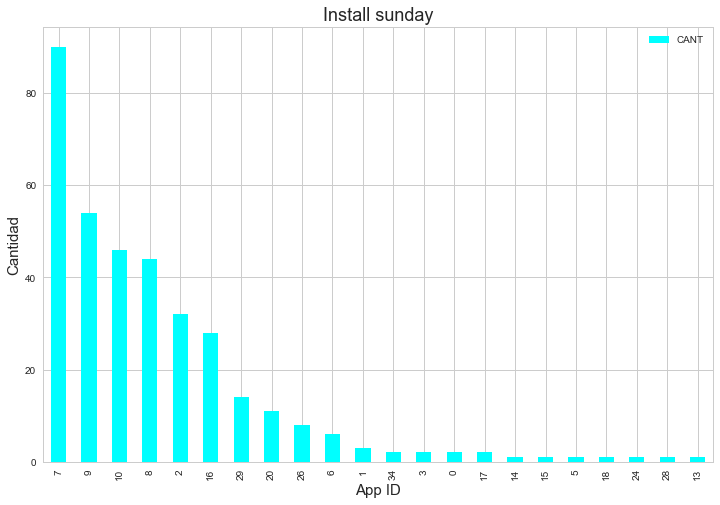

In [112]:
g = dom.plot.bar(figsize = (12,8),color=['cyan'])
g.set_title("Install sunday",fontsize=18)
g.set_ylabel("Cantidad",fontsize=15)
g.set_xlabel("App ID",fontsize=15)